# Beginner's Guide to NLP in Table Form

| 🔢 Step | 📌 Topic                       | 🧠 What It Means                                            | 💡 Example                                 |
| ------- | ------------------------------ | ----------------------------------------------------------- | ------------------------------------------ |
| 1       | **What is NLP?**               | Teach computers to read, understand, and use human language | Chatbots, Google Translate, Spam Detection |
| 2       | **Why text is tricky**         | Computers can't read text, so we convert it to numbers      | "I love pizza" → \[0.1, 0.5, 0.3]          |
| 3       | **Text Preprocessing**         | Clean text to remove noise                                  |                                            |
|         | Lowercasing                    | Make all text lowercase                                     | "Good Movie" → "good movie"                |
|         | Removing punctuation           | Delete symbols                                              | "great!" → "great"                         |
|         | Removing stopwords             | Remove common useless words                                 | "I am happy" → "happy"                     |
|         | Tokenization                   | Split sentence into words                                   | "I love dogs" → \[“I”, “love”, “dogs”]     |
|         | Stemming                       | Cut word to its root                                        | “playing” → “play”                         |
|         | Lemmatization                  | Get base word using vocabulary                              | “better” → “good”                          |
| 4       | **Convert Text to Numbers**    | Vectorization = Turn words into numerical format            |                                            |
|         | Bag of Words                   | Count word frequency                                        | "I love cats and cats" → {"cats":2}        |
|         | TF-IDF                         | Boost rare words                                            | “excellent” has more weight than “the”     |
|         | Word Embedding                 | Words as meaningful vectors                                 | "king" and "queen" → similar vectors       |
| 5       | **Choose ML Task**             | What do you want to do with the text?                       |                                            |
|         | Text Classification            | Label text                                                  | Spam or Not Spam                           |
|         | Sentiment Analysis             | Detect feeling                                              | Movie review: Positive or Negative         |
|         | Topic Modeling                 | Discover topics                                             | News articles: Sports, Politics            |
|         | NER (Named Entity Recognition) | Find names, dates, places                                   | "Apple was founded by Steve Jobs"          |
|         | Text Generation                | Create new text                                             | "Once upon a time..." (like GPT)           |
| 6       | **Train a Model**              | Use ML algorithm on the text                                | Logistic Regression, Naive Bayes           |
| 7       | **Test the Model**             | Check if model predicts well                                | Give new input and see results             |
| 8       | **Deploy the Model**           | Use it in real life apps                                    | Chatbot, Comment filter, Resume matcher    |

# Common Tools You’ll Use

| Tool                          | Purpose                                           |
| ----------------------------- | ------------------------------------------------- |
| **Python**                    | Programming language                              |
| **NLTK**                      | Text preprocessing (tokenizing, stop words, etc.) |
| **SpaCy**                     | Fast and powerful NLP library                     |
| **Scikit-learn**              | Machine learning models                           |
| **Gensim**                    | Word embeddings and topic modeling                |
| **Hugging Face Transformers** | Pretrained advanced NLP models                    |
| **Pandas**                    | Handling data in table format                     |
| **Matplotlib / Seaborn**      | Visualizing results                               |


## 🔶 Text Clustering using K-Means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
import string
# Download stopwords To Your System(only first and One time)
nltk.download('stopwords') #Then Remove From The Code

#import the stopwords which is downloaded in your system for any project
from nltk.corpus import stopwords

In [2]:
# Small sample dataset of reviews
reviews = [
    "The battery life of this phone is amazing.",
    "Customer support was very helpful and polite.",
    "Terrible experience, the product stopped working in a week.",
    "Camera quality is superb, very satisfied.",
    "Delivery was late and packaging was damaged.",
    "Best phone for the price. Totally worth it!",
    "I’m very disappointed with the service.",
    "The screen resolution is fantastic and bright.",
    "Refund process took too long.",
    "Great performance and very fast.",
    "Worst experience ever. Do not recommend.",
    "Helpful staff and quick service.",
    "Packaging was neat and delivery was on time.",
    "Processor is very fast and handles games well.",
    "Customer care was rude and unhelpful.",
    "Love the display and sound quality!",
    "The device heats up quickly.",
    "Excellent phone with great battery and display.",
    "Return policy was confusing and unclear.",
    "Very happy with my purchase!"
]

# Convert to a DataFrame
df = pd.DataFrame({'review': reviews})
df.head()

,review
0,The battery life of this phone is amazing.
1,Customer support was very helpful and polite.
2,"Terrible experience, the product stopped worki..."
3,"Camera quality is superb, very satisfied."
4,Delivery was late and packaging was damaged.


In [3]:
def clean_text(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return ' '.join(words)

df['cleaned'] = df['review'].apply(clean_text)
df.head()

,review,cleaned
0,The battery life of this phone is amazing.,battery life phone amazing
1,Customer support was very helpful and polite.,customer support helpful polite
2,"Terrible experience, the product stopped worki...",terrible experience product stopped working week
3,"Camera quality is superb, very satisfied.",camera quality superb satisfied
4,Delivery was late and packaging was damaged.,delivery late packaging damaged


In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned'])

words = vectorizer.get_feature_names_out()
df_tfidf = pd.DataFrame(X[:10].toarray(), columns=words)
df_tfidf.head(5)

,amazing,battery,best,bright,camera,care,confusing,customer,damaged,delivery,...,time,took,totally,unclear,unhelpful,week,well,working,worst,worth
0,0.542183,0.476587,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.46684,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.416209,0.0,0.416209,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.514844,0.0,0.0,0.00000,0.000000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00000,0.531094,0.46684,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


In [5]:
# Try 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Assign cluster labels
df['cluster'] = kmeans.labels_
df.head()

,review,cleaned,cluster
0,The battery life of this phone is amazing.,battery life phone amazing,0
1,Customer support was very helpful and polite.,customer support helpful polite,2
2,"Terrible experience, the product stopped worki...",terrible experience product stopped working week,0
3,"Camera quality is superb, very satisfied.",camera quality superb satisfied,0
4,Delivery was late and packaging was damaged.,delivery late packaging damaged,1


In [6]:
for i in range(3):
    print(f"\n🟩 Cluster {i}:")
    print(df[df['cluster'] == i]['review'].to_string(index=False))


🟩 Cluster 0:
        The battery life of this phone is amazing.
Terrible experience, the product stopped workin...
         Camera quality is superb, very satisfied.
       Best phone for the price. Totally worth it!
           I’m very disappointed with the service.
    The screen resolution is fantastic and bright.
                     Refund process took too long.
                  Great performance and very fast.
          Worst experience ever. Do not recommend.
    Processor is very fast and handles games well.
               Love the display and sound quality!
                      The device heats up quickly.
   Excellent phone with great battery and display.
          Return policy was confusing and unclear.
                      Very happy with my purchase!

🟩 Cluster 1:
Delivery was late and packaging was damaged.
Packaging was neat and delivery was on time.

🟩 Cluster 2:
Customer support was very helpful and polite.
             Helpful staff and quick service.
        Cus

| **Cluster**   | **Theme / Focus**              | **Keywords (approx)**                                | **Sentiment Mix**           | **Example Reviews**                                                                                                                                                                    |
| ------------- | ------------------------------ | ---------------------------------------------------- | --------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Cluster 0** | Product Features & Performance | battery, camera, performance, screen, display, phone | Mixed (positive + negative) | - "The battery life of this phone is amazing."<br> - "Camera quality is superb, very satisfied."<br> - "The device heats up quickly."<br> - "Worst experience ever. Do not recommend." |
| **Cluster 1** | Delivery & Packaging           | delivery, packaging, damaged, late                   | Mixed                       | - "Delivery was late and packaging was damaged."<br> - "Packaging was neat and delivery was on time."                                                                                  |
| **Cluster 2** | Customer Support / Service     | customer, support, staff, polite, rude               | Mixed                       | - "Customer support was very helpful and polite."<br> - "Customer care was rude and unhelpful."<br> - "Helpful staff and quick service."                                               |

In [7]:
# 🔸 Example new review
new_review = ["I love the camera quality and display of this phone"]

cleaned_new = [clean_text(new_review[0])]

# 🔸 Transform using same vectorizer
new_vec = vectorizer.transform(cleaned_new)

# 🔸 Predict the cluster
predicted_cluster = kmeans.predict(new_vec)

print(f"🟩 The new review belongs to Cluster {predicted_cluster[0]}")

🟩 The new review belongs to Cluster 0


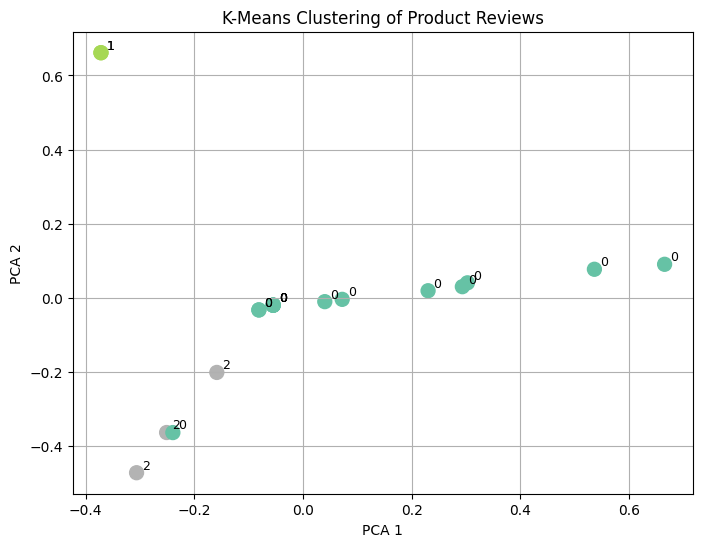

In [8]:
# Reduce to 2D for plotting
pca = PCA(n_components=2, random_state=42)
X_2D = pca.fit_transform(X.toarray())

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=df['cluster'], cmap='Set2', s=100)
for i, txt in enumerate(df['cluster']):
    plt.annotate(txt, (X_2D[i, 0]+0.01, X_2D[i, 1]+0.01), fontsize=9)
plt.title("K-Means Clustering of Product Reviews")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

| Point                     | Explanation                                                                                                                   |
| ------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| **Why mixed sentiment?**  | K-Means doesn't understand emotions — it groups by **similar word patterns**, not whether the review is positive or negative. |
| **Cluster 0 is largest**  | Most reviews talk about **how the product works**, which is why it's the largest and most diverse cluster.                    |
| **Cluster 1 is smallest** | Only a few reviews talked about **delivery**, so it naturally formed a smaller but focused group.                             |
| **Cluster 2 is specific** | Even though the tone varies (helpful vs rude), all reviews are about **interacting with customer support**.                   |

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display a word cloud for a given cluster
def show_wordcloud(cluster_num):
    text = ' '.join(df[df['cluster'] == cluster_num]['cleaned'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for Cluster {cluster_num}", fontsize=16)
    plt.show()

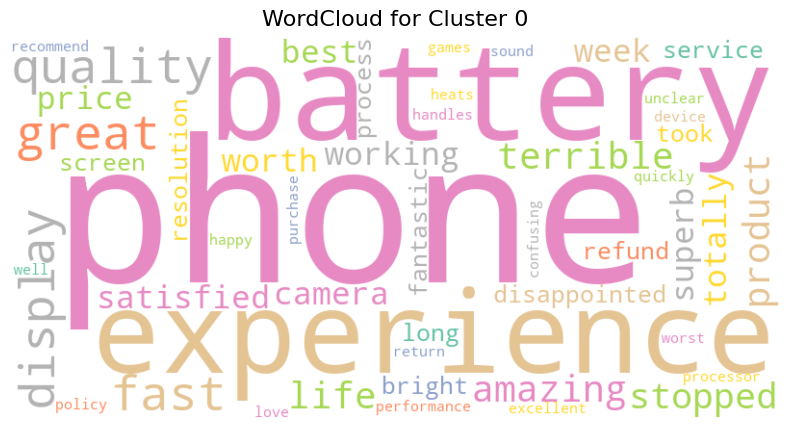

In [10]:
show_wordcloud(0)

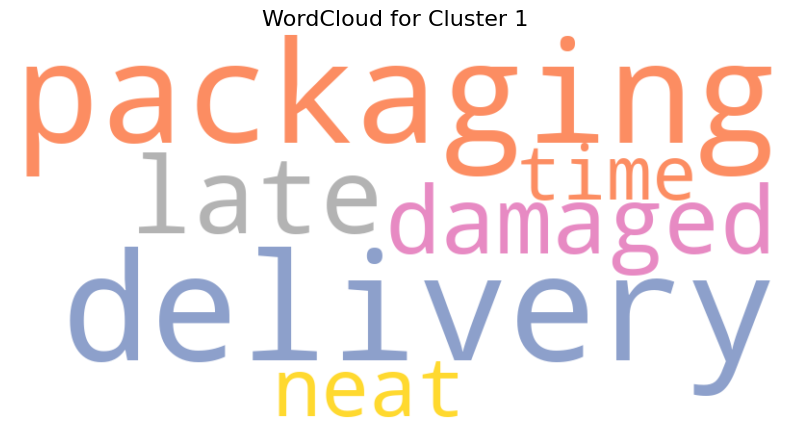

In [11]:
show_wordcloud(1)

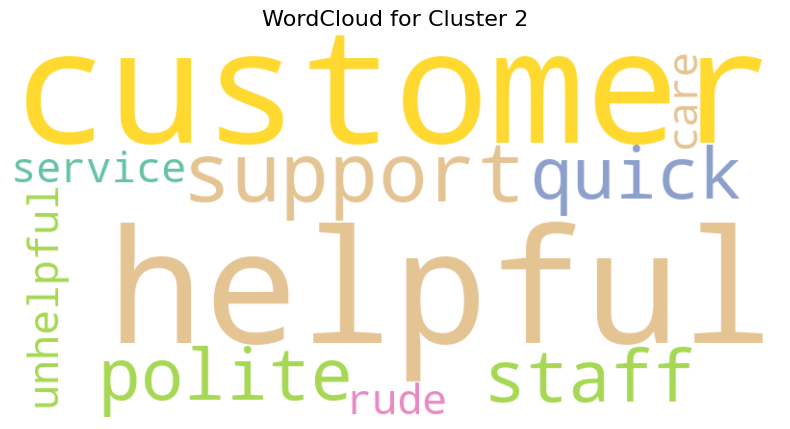

In [12]:
show_wordcloud(2)

## Sentiment Analysis – Overview Table

| **Aspect**            | **Explanation**                                                                                                                                    |
| --------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **What is it?**       | A Natural Language Processing (NLP) technique used to identify the **emotional tone** or **opinion** behind a piece of text.                       |
| **Goal**              | To detect whether the text expresses a **positive**, **negative**, or **neutral** sentiment.                                                       |
| **How it works**      | Uses **rule-based**, **machine learning**, or **deep learning** models to analyze the words and tone in text.                                      |
| **Input**             | Text data — e.g., product reviews, tweets, comments, support tickets.                                                                              |
| **Output**            | A **sentiment label** (like *Positive*, *Negative*, *Neutral*) and often a **sentiment score** (e.g., -1 to 1).                                    |
| **Why it’s used**     | Helps companies and researchers **understand opinions**, monitor feedback, improve products, or automate moderation.                               |
| **Tools & Libraries** | VADER (rule-based), TextBlob, HuggingFace, BERT, RoBERTa, etc.                                                                                     |
| **Use Cases**         | - Product review analysis<br>- Social media monitoring<br>- Customer feedback<br>- Brand reputation tracking<br>- Political or news opinion mining |

| **Text**                                       | **Sentiment** | **Reason**                                        |
| ---------------------------------------------- | ------------- | ------------------------------------------------- |
| "I love this phone, it's super fast!"          | Positive      | Words like *love*, *super fast* show satisfaction |
| "Customer service was terrible and unhelpful." | Negative      | *Terrible*, *unhelpful* are negative tone         |
| "It’s okay, not great but not bad either."     | Neutral       | Balanced opinion with no strong emotion           |


In [13]:
# Import Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment label
def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply to original reviews
df['sentiment'] = df['review'].apply(get_sentiment)

In [14]:
# Group by cluster and sentiment
sentiment_counts = df.groupby(['cluster', 'sentiment']).size().unstack().fillna(0)

# Show sentiment distribution per cluster
sentiment_counts

sentiment,Negative,Neutral,Positive
cluster,,,
0,4.0,2.0,9.0
1,1.0,0.0,1.0
2,0.0,0.0,3.0


| Question                                   | Answer You Can Now Find                                             |
| ------------------------------------------ | ------------------------------------------------------------------- |
| Are people happy with product performance? | Yes — most reviews in Cluster 0 are positive.                       |
| Is delivery a pain point?                  | Cluster 1 has negative reviews about delivery delays.               |
| How do customers feel about service staff? | Cluster 2 shows mixed service experiences (some polite, some rude). |


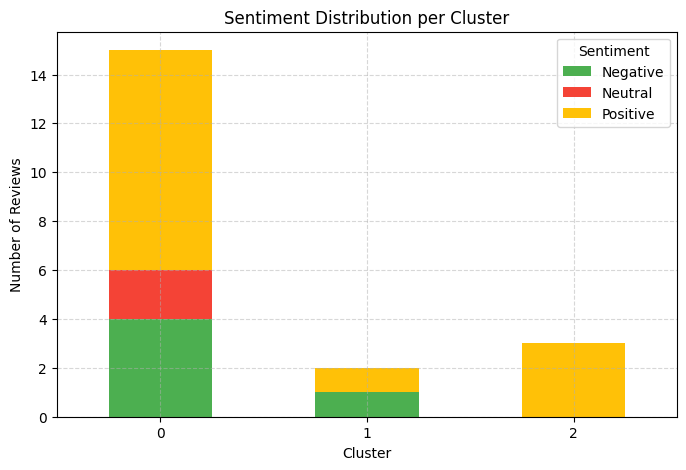

In [15]:
custom_colors = ['#4CAF50', '#F44336', '#FFC107']  

sentiment_counts.plot(
    kind='bar',
    stacked=True,
    color=custom_colors,
    figsize=(8, 5)
)

plt.title("Sentiment Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=0)
plt.legend(title="Sentiment", labels=sentiment_counts.columns)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Real-World NLP Models and Applications

| **Application**                    | **NLP Task**                      | **Model Types Used**                                  | **Examples / Tools**                                                     |
| ---------------------------------- | --------------------------------- | ----------------------------------------------------- | ------------------------------------------------------------------------ |
| **Spam Detection**                 | Text Classification               | Naive Bayes, Logistic Regression, SVM, BERT           | Gmail spam filter, SMS spam apps                                         |
| **Sentiment Analysis**             | Sentiment Classification          | Logistic Regression, LSTM, BERT, RoBERTa              | Movie review apps, Product review analysis, Twitter sentiment monitoring |
| **Topic Discovery**                | Topic Modeling / Clustering       | LDA (Latent Dirichlet Allocation), K-Means, NMF       | News aggregation, Document classification                                |
| **Search Engines**                 | Information Retrieval             | BM25, TF-IDF, BERT (semantic search)                  | Google Search, YouTube Search, Amazon product search                     |
| **Chatbots & Virtual Assistants**  | Text Generation + Classification  | Seq2Seq, RNNs, Transformers (GPT, BERT, T5)           | Siri, Alexa, Google Assistant, customer support bots                     |
| **Language Translation**           | Sequence-to-Sequence (Seq2Seq)    | RNNs, LSTMs, Transformers (e.g., T5, MarianMT, mBART) | Google Translate, DeepL                                                  |
| **Voice Assistants**               | Speech-to-Text + Intent Detection | ASR + BERT-based classifiers                          | Alexa, Siri, Google Assistant                                            |
| **Search Autocomplete**            | Next Word Prediction              | N-grams, RNNs, Transformers                           | Google Search suggestions, IDE code completion                           |
| **Named Entity Recognition (NER)** | Entity Detection                  | CRF, Bi-LSTM, BERT, SpaCy                             | Extracting names, dates, locations from text (legal docs, resumes, etc.) |
| **Document Summarization**         | Text Summarization                | Seq2Seq, Transformers (PEGASUS, BART, T5)             | News summarizers, meeting note tools                                     |
| **Fake News Detection**            | Text Classification               | Logistic Regression, Random Forest, BERT              | Media monitoring tools                                                   |
| **Resume Screening**               | Classification + NER              | SVM, BERT + rule-based filtering                      | Hiring platforms, HR screening tools                                     |
| **Text-to-Speech (TTS)**           | Text Generation                   | Tacotron, FastSpeech, WaveNet                         | Google TTS, Amazon Polly                                                 |
| **Plagiarism Detection**           | Text Similarity / Matching        | TF-IDF cosine similarity, BERT similarity             | Grammarly, Turnitin                                                      |
| **Text Clustering**                | Unsupervised Clustering           | K-Means, DBSCAN, HDBSCAN, LDA                         | Customer review analysis, feedback grouping                              |

# Types of Models (Grouped by Task)

| **Task Type**                | **Common Models**                                          |
| ---------------------------- | ---------------------------------------------------------- |
| **Text Classification**      | Naive Bayes, Logistic Regression, SVM, Random Forest, BERT |
| **Text Generation**          | RNN, LSTM, GPT, T5, BART                                   |
| **Text Similarity**          | TF-IDF + cosine, BERT embeddings                           |
| **Topic Modeling**           | LDA, NMF                                                   |
| **NER (Entity Recognition)** | CRF, BiLSTM-CRF, BERT                                      |
| **Clustering**               | K-Means, DBSCAN                                            |
| **Summarization**            | T5, BART, PEGASUS                                          |
| **Translation**              | Transformer-based (MarianMT, mBART, T5)                    |